<a href="https://colab.research.google.com/github/yasir9030/Machine_learning/blob/main/28_kernal_pCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 0 14  0]
 [ 0 15  0]
 [ 0  7  0]]
Accuracy: 0.4166666666666667


/tmp/ipython-input-1495190781.py:65: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


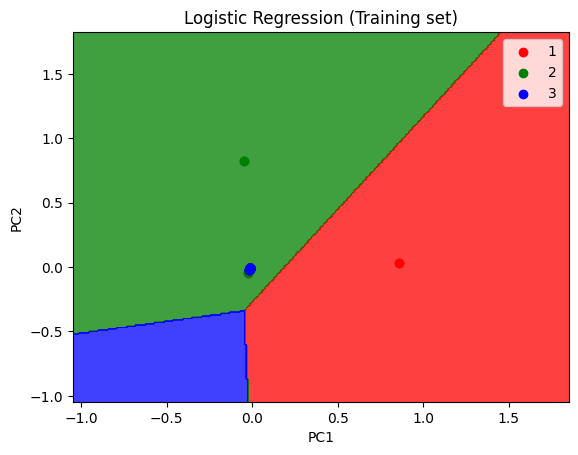

/tmp/ipython-input-1495190781.py:99: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


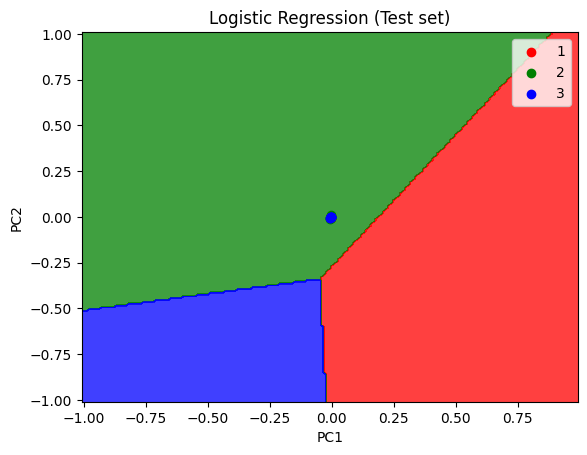

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset
dataset = pd.read_csv('bb222ea44cb14f4d9f8729328cd08a21_wine.csv')

# Selecting only Age & Estimated Salary (2 features for visualization)
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values # Changed from 1 to 0 to select the discrete class labels

# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Scaling
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)




# Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1))

# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# -----------------------------
# Visualising Training Set
# -----------------------------
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    X1, X2,
    classifier.predict(
        np.array([X1.ravel(), X2.ravel()]).T
    ).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green", "blue")) # Added "blue" for potentially more classes
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green", "blue"))(i), # Added "blue"
        label=j
    )

plt.title("Logistic Regression (Training set)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# -----------------------------
# Visualising Test Set
# -----------------------------
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green", "blue")) # Added "blue"
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green", "blue"))(i), # Added "blue"
        label=j
    )

plt.title("Logistic Regression (Test set)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()